# Historical Threshold Analysis 

Calculate the temp threshold for each cell. 

Mean residual life plot probably wouldn't work as need to manually do it for every cell. 

## Questions

* Are we setting a threshold for each city or a general threshold?


In [ ]:
import pandas as pd
import sys
import numpy as np

# Load in all data
tasmin = pd.read_csv("tasmin.csv")
tasmin = tasmin.set_index(["lon", "lat"])

# Choose random cell
df = tasmin.loc[tasmin.index[0]]

# Ascending order
sorted_temp = sorted(df.temperature)

In [46]:
print(sorted_temp[:5])
print(sorted_temp[-5:])
print(len(sorted_temp))

n = len(sorted_temp)

# Make sure to print out actual values
k1 = int(round(n**0.5))
k2 = int(round((n ** (2 / 3)) / np.log(np.log(n))))
k3 = int(round(n * 0.1))
k4 = int(round(n * 0.05))
k5 = int(round(n * 0.01))

k_up_to_5 = np.array([k1, k2, k3, k4, k5])
k6 = int(round(k_up_to_5.mean()))

[258.368042, 258.998932, 262.119263, 262.910767, 263.517853]
[291.717651, 291.918488, 291.95816, 292.735809, 293.286377]
13880


In [47]:
# Number of excedences
k1, k2, k3, k4, k5, k6

(118, 256, 1388, 694, 139, 519)

In [52]:
# Threshold value is
k1_thresh = sorted_temp[-k1]
k2_thresh = sorted_temp[-k2]
k3_thresh = sorted_temp[-k3]
k4_thresh = sorted_temp[-k4]
k5_thresh = sorted_temp[-k5]
k6_thresh = sorted_temp[-k6]

The variable `k3` is much bigger than the rest and therefore should not be used.

Can graph all the k-values for each cell to find an optimal solution

In [74]:
data = {
    "lon": tasmin.index[0][0],
    "lat": tasmin.index[0][1],
    "k1_thresh": k1_thresh,
    "k1_num_excedences": k1,
    "k2_thresh": k2_thresh,
    "k2_num_excedences": k2,
    "k3_thresh": k3_thresh,
    "k3_num_excedences": k3,
    "k4_thresh": k4_thresh,
    "k4_num_excedences": k4,
    "k5_thresh": k5_thresh,
    "k5_num_excedences": k5,
    "k6_thresh": k6_thresh,
    "k6_num_excedences": k6,
}
thresholds = pd.DataFrame(data, index=[0])

thresholds = thresholds.set_index(["lon", "lat"])
thresholds
thresholds.to_csv("thresh.csv")

In [86]:
import pandas as pd
import sys
import numpy as np


def create_threshold_csv(filename):
    df = pd.read_csv(filename)
    df = df.set_index(["lon", "lat"])

    unique_indexes = np.unique(df.index)

    for i, cell in enumerate(unique_indexes):
        subset = df.loc[cell]
        sorted_temp = sorted(subset.temperature)

        n = len(sorted_temp)

        # Create k values
        k1 = int(round(n**0.5))
        k2 = int(round((n ** (2 / 3)) / np.log(np.log(n))))
        k3 = int(round(n * 0.1))
        k4 = int(round(n * 0.05))
        k5 = int(round(n * 0.01))

        k_up_to_5 = np.array([k1, k2, k3, k4, k5])
        k6 = int(round(k_up_to_5.mean()))

        # Threshold value is
        k1_thresh = sorted_temp[-k1]
        k2_thresh = sorted_temp[-k2]
        k3_thresh = sorted_temp[-k3]
        k4_thresh = sorted_temp[-k4]
        k5_thresh = sorted_temp[-k5]
        k6_thresh = sorted_temp[-k6]

        data = {
            "lon": cell[0],
            "lat": cell[1],
            "k1_thresh": k1_thresh,
            "k1_num_excedences": k1,
            "k2_thresh": k2_thresh,
            "k2_num_excedences": k2,
            "k3_thresh": k3_thresh,
            "k3_num_excedences": k3,
            "k4_thresh": k4_thresh,
            "k4_num_excedences": k4,
            "k5_thresh": k5_thresh,
            "k5_num_excedences": k5,
            "k6_thresh": k6_thresh,
            "k6_num_excedences": k6,
        }

        thresholds = pd.DataFrame(data, index=[0])
        thresholds = thresholds.set_index(["lon", "lat"])

        if i == 0:
            thresholds.to_csv(f"{filename[:-4]}_thresh.csv")
            print(
                f"List index {i} successfully added {cell} to {filename[:-4]}_thresh.csv"
            )
        else:
            thresholds.to_csv(f"{filename[:-4]}_thresh.csv", mode="a", header=False)
            print(
                f"List index {i} successfully added {cell} to {filename[:-4]}_thresh.csv"
            )

In [89]:
# Change out the filename to 'tasmin.csv' and 'tasmax.csv' to get the other data
create_threshold_csv("tasday.csv")

/Users/king/opt/anaconda3/envs/thresh/lib/python3.7/site-packages/ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':


List index 0 successfully added (-122.75, 42.25) to tasday_thresh.csv
List index 1 successfully added (-119.75, 34.25) to tasday_thresh.csv
List index 2 successfully added (-118.25, 34.75) to tasday_thresh.csv
List index 3 successfully added (-109.75, 31.25) to tasday_thresh.csv
List index 4 successfully added (-106.75, 32.25) to tasday_thresh.csv
List index 5 successfully added (-106.25, 28.75) to tasday_thresh.csv
List index 6 successfully added (-103.25, 25.75) to tasday_thresh.csv
List index 7 successfully added (-102.75, 20.75) to tasday_thresh.csv
List index 8 successfully added (-99.75, 16.75) to tasday_thresh.csv
List index 9 successfully added (-99.75, 17.75) to tasday_thresh.csv
List index 10 successfully added (-98.75, 20.25) to tasday_thresh.csv
List index 11 successfully added (-98.25, 34.75) to tasday_thresh.csv
List index 12 successfully added (-97.75, 25.75) to tasday_thresh.csv
List index 13 successfully added (-97.25, 19.75) to tasday_thresh.csv
List index 14 successf

List index 118 successfully added (12.75, 2.75) to tasday_thresh.csv
List index 119 successfully added (13.25, -1.75) to tasday_thresh.csv
List index 120 successfully added (13.75, 11.75) to tasday_thresh.csv
List index 121 successfully added (14.25, -5.75) to tasday_thresh.csv
List index 122 successfully added (14.25, 9.75) to tasday_thresh.csv
List index 123 successfully added (14.25, 14.25) to tasday_thresh.csv
List index 124 successfully added (14.75, -5.75) to tasday_thresh.csv
List index 125 successfully added (15.25, 37.75) to tasday_thresh.csv
List index 126 successfully added (16.25, 1.75) to tasday_thresh.csv
List index 127 successfully added (16.75, 40.75) to tasday_thresh.csv
List index 128 successfully added (17.25, -12.25) to tasday_thresh.csv
List index 129 successfully added (17.75, 8.75) to tasday_thresh.csv
List index 130 successfully added (18.25, 52.75) to tasday_thresh.csv
List index 131 successfully added (18.75, 8.75) to tasday_thresh.csv
List index 132 successfu

List index 238 successfully added (75.75, 17.75) to tasday_thresh.csv
List index 239 successfully added (76.25, 12.75) to tasday_thresh.csv
List index 240 successfully added (76.75, 25.75) to tasday_thresh.csv
List index 241 successfully added (76.75, 30.75) to tasday_thresh.csv
List index 242 successfully added (76.75, 43.25) to tasday_thresh.csv
List index 243 successfully added (76.75, 66.25) to tasday_thresh.csv
List index 244 successfully added (77.75, 19.75) to tasday_thresh.csv
List index 245 successfully added (78.25, 10.75) to tasday_thresh.csv
List index 246 successfully added (78.25, 12.75) to tasday_thresh.csv
List index 247 successfully added (78.25, 15.25) to tasday_thresh.csv
List index 248 successfully added (78.25, 24.25) to tasday_thresh.csv
List index 249 successfully added (78.75, 11.75) to tasday_thresh.csv
List index 250 successfully added (79.25, 9.75) to tasday_thresh.csv
List index 251 successfully added (79.25, 19.25) to tasday_thresh.csv
List index 252 succes

List index 356 successfully added (129.25, 40.75) to tasday_thresh.csv
List index 357 successfully added (137.25, 34.75) to tasday_thresh.csv
List index 358 successfully added (137.75, -3.75) to tasday_thresh.csv
List index 359 successfully added (138.75, 35.75) to tasday_thresh.csv
List index 360 successfully added (140.75, 38.25) to tasday_thresh.csv
List index 361 successfully added (140.75, 40.75) to tasday_thresh.csv
List index 362 successfully added (141.25, 43.25) to tasday_thresh.csv
List index 363 successfully added (142.75, -3.25) to tasday_thresh.csv
List index 364 successfully added (144.75, -6.25) to tasday_thresh.csv


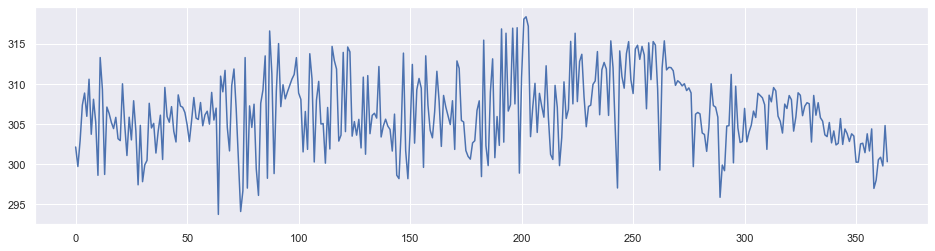

In [1]:
import pandas as pd

tasday = pd.read_csv("tasday_thresh.csv")
tasday = tasday.set_index(["lon", "lat"])

thresh_cols = [c for c in tasday if c.endswith("thresh")]
tasday_thresh = tasday[thresh_cols]

fig, ax = plt.subplots(figsize=plt.figaspect(1 / 4))

# for col in tas

ax.plot(tasday.k1_thresh.values)

In [2]:
tasday_thresh

k1_thresh   k2_thresh   k3_thresh   k4_thresh   k5_thresh  \
lon     lat                                                                  
-122.75  42.25  302.153412  300.845398  295.851410  298.098175  301.320526   
-119.75  34.25  299.716675  298.651001  295.128632  296.578583  298.962524   
-118.25  34.75  302.947174  301.748688  297.622314  299.328094  302.069550   
-109.75  31.25  307.382935  305.765350  300.622894  302.772980  306.339966   
-106.75  32.25  308.890381  307.199158  301.385498  303.749878  307.777802   
...                    ...         ...         ...         ...         ...   
 140.75  38.25  300.563324  299.990234  296.935028  298.469299  300.176117   
         40.75  300.873413  300.093964  296.516663  298.169556  300.367706   
 141.25  43.25  299.783600  299.048462  295.329346  297.069702  299.278107   
 142.75 -3.25   304.832214  304.475800  303.446259  303.822784  304.598053   
 144.75 -6.25   300.314941  299.696411  298.438477  298.898804  299.870850   

                 k6_thresh  
lon     lat                 
-122.75  42.25  298.950012  
-119.75  34.25  297.145508  
-118.25  34.75  299.997101  
-109.75  31.25  303.554626  
-106.75  32.25  304.758057  
...                    ...  
 140.75  38.25  298.967865  
         40.75  298.799377  
 141.25  43.25  297.708801  
 142.75 -3.25   304.001068  
 144.75 -6.25   299.104401  

[365 rows x 6 columns]

In [39]:
tasday_thresh.describe()

,k1_thresh,k2_thresh,k3_thresh,k4_thresh,k5_thresh,k6_thresh
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,306.521714,305.416015,301.915943,303.334866,305.769625,303.920447
std,4.720920,4.769510,4.976960,4.883209,4.750755,4.849538
min,293.730438,292.322571,287.679047,290.278076,292.756165,290.814056
25%,303.405609,302.273651,298.572235,300.259613,302.566223,300.753387
50%,306.251709,305.356445,302.130829,303.520294,305.625122,303.963593
75%,309.578033,308.487976,305.230530,306.531067,308.763794,307.088348
max,318.423828,317.234009,314.339142,315.562622,317.546783,316.012299


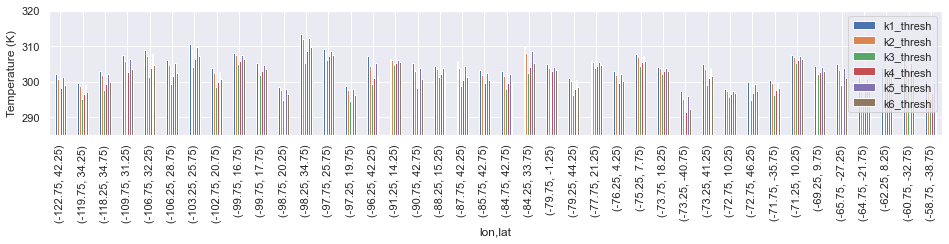

In [47]:
# Set scale to min and max values
# fig, ax = plt.subplots(figsize=plt.figaspect(1/3))
tasday_thresh.iloc[:40].plot.bar(figsize=plt.figaspect(1 / 7), ylim=[285, 320])
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()

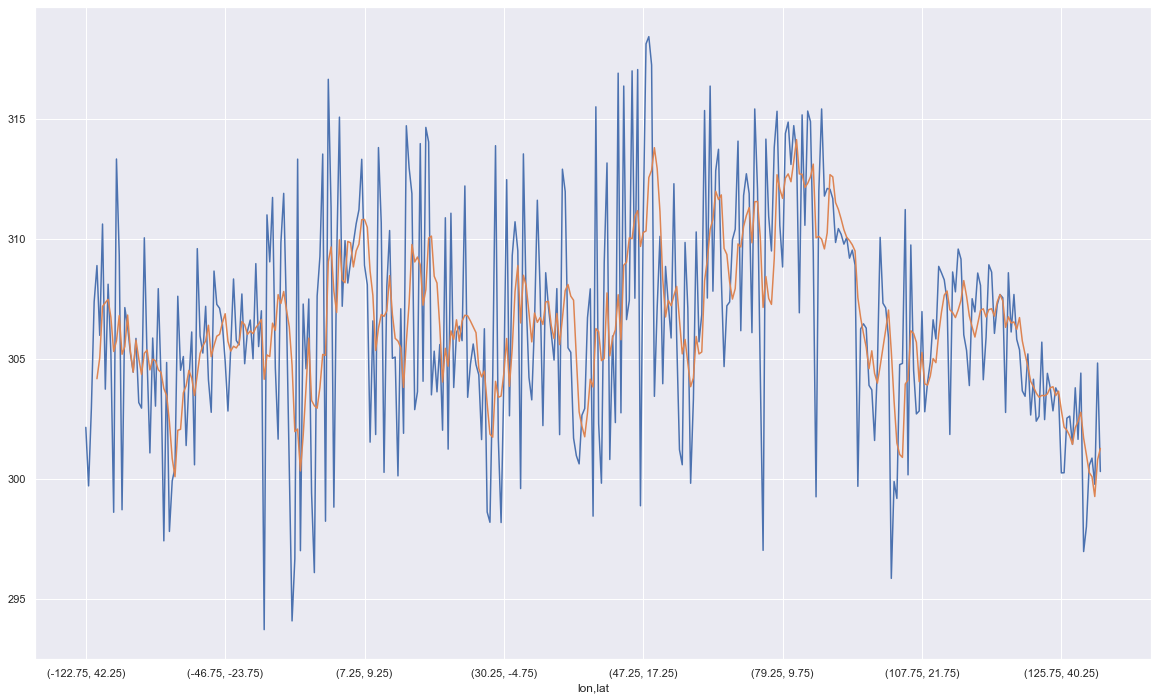

In [85]:
# Tail-rolling average transform
rolling = tasday_thresh.rolling(window=5, win_type="exponential")
rolling_mean = rolling.mean(tau=20)

tasday_thresh.k1_thresh.plot(figsize=(20, 12))
rolling_mean.k1_thresh.plot(figsize=(20, 12))
plt.show()

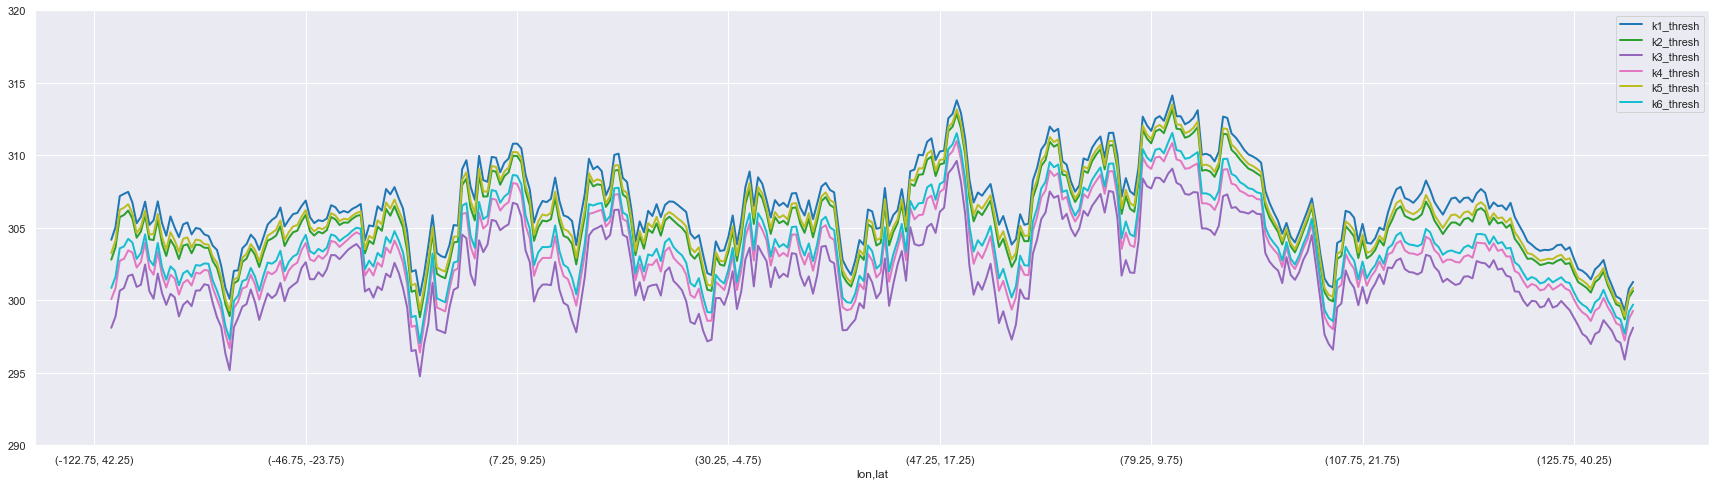

In [122]:
rolling_mean.plot(figsize=(30, 8), lw=2, ylim=[290, 320], colormap="tab10")

In [106]:
for row in rolling_mean.iterrows():
    print(row.mean())

AttributeError: 'tuple' object has no attribute 'mean'

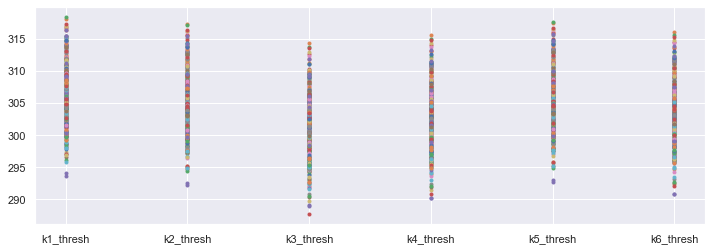

In [18]:
fig, ax = plt.subplots(figsize=plt.figaspect(1 / 3))
for index, row in tasday_thresh.iterrows():
    ax.plot(row, ".")

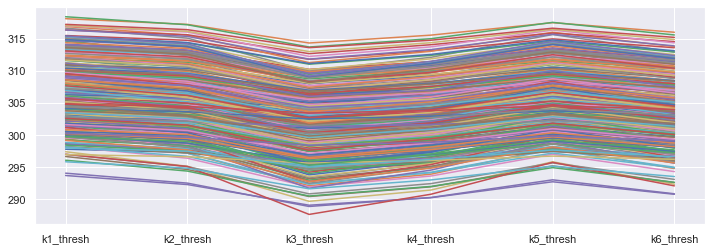

In [19]:
fig, ax = plt.subplots(figsize=plt.figaspect(1 / 3))
for index, row in tasday_thresh.iterrows():
    ax.plot(row)

For each cell, calculate k6, keep values greater than or equal to and save them in a new big csv.

In [4]:
tasday = pd.read_csv("tasday.csv")
tasday = tasday.set_index(["lon", "lat", "date"])

tasday_thresh = pd.read_csv("tasday_thresh.csv")
tasday_thresh = tasday_thresh.set_index(["lon", "lat"])

avg_values = tasday_thresh.k6_thresh

In [ ]:
import sys

cells = list(tasday_thresh.index)


val = avg_values.loc[cells[0]]
print(val)
print(cells[0])

above_thresh_mask = tasday.loc[cells[0]].temperature >= val

above_thresh_df = tasday.loc[cells[0]][above_thresh_mask]
# above_thresh_df.to_csv('name')

In [23]:
cells

[(-122.75, 42.25),
 (-119.75, 34.25),
 (-118.25, 34.75),
 (-109.75, 31.25),
 (-106.75, 32.25),
 (-106.25, 28.75),
 (-103.25, 25.75),
 (-102.75, 20.75),
 (-99.75, 16.75),
 (-99.75, 17.75),
 (-98.75, 20.25),
 (-98.25, 34.75),
 (-97.75, 25.75),
 (-97.25, 19.75),
 (-96.25, 42.25),
 (-91.25, 14.25),
 (-90.75, 42.75),
 (-88.25, 15.25),
 (-87.75, 42.25),
 (-85.75, 42.75),
 (-84.75, 42.75),
 (-84.25, 33.75),
 (-79.75, -1.25),
 (-79.25, 44.25),
 (-77.75, 21.25),
 (-76.25, 4.25),
 (-75.25, 7.75),
 (-73.75, 18.25),
 (-73.25, -40.75),
 (-73.25, 41.25),
 (-72.75, 10.25),
 (-72.75, 46.25),
 (-71.75, -35.75),
 (-71.25, 10.25),
 (-69.25, 9.75),
 (-65.75, -27.25),
 (-64.75, -21.75),
 (-62.25, 8.25),
 (-60.75, -32.75),
 (-58.75, -38.75),
 (-56.25, -25.75),
 (-54.25, -31.25),
 (-53.25, -26.25),
 (-51.25, -22.25),
 (-50.25, -29.75),
 (-50.25, -27.75),
 (-48.75, -2.75),
 (-47.75, -23.25),
 (-47.75, -18.25),
 (-47.25, -2.75),
 (-46.75, -23.75),
 (-44.25, -22.75),
 (-44.25, -19.25),
 (-43.25, -4.75),
 (-42.7

In [15]:
above_thresh_df["lon"] = cells[0][0]
above_thresh_df["lat"] = cells[0][1]
above_thresh_df = above_thresh_df.reset_index()
above_thresh_df = above_thresh_df.set_index(["lon", "lat", "date"])
above_thresh_df

temperature
lon     lat   date                   
-122.75 42.25 2006-06-19   299.359314
              2006-07-17   299.559723
              2006-07-18   302.425812
              2006-07-19   303.899597
              2006-07-20   304.475830
...                               ...
              2099-08-10   301.223633
              2099-08-11   300.255951
              2099-08-12   300.908020
              2099-08-13   300.311768
              2099-08-18   298.962708

[1226 rows x 1 columns]

In [4]:
tasday = pd.read_csv("tasday.csv")
tasday = tasday.set_index(["lon", "lat", "date"])

tasday_thresh = pd.read_csv("tasday_thresh.csv")
tasday_thresh = tasday_thresh.set_index(["lon", "lat"])

avg_values = tasday_thresh.k6_thresh

In [2]:
def get_heatwaves(filename, filename_thresh):
    tas = pd.read_csv(filename)
    tas = tas.set_index(["lon", "lat", "date"])

    tas_thresh = pd.read_csv(filename_thresh)
    tas_thresh = tas_thresh.set_index(["lon", "lat"])

    avg_values = tas_thresh.k6_thresh

    cells = list(tas_thresh.index)

    for i, cell in enumerate(cells):
        # Get the threshold value
        thresh_val = avg_values.loc[cell]
        above_thresh_mask = tas.loc[cell].temperature >= thresh_val
        above_thresh_df = tas.loc[cell][above_thresh_mask]
        # Create lon and lat columns
        above_thresh_df["lon"] = cell[0]
        above_thresh_df["lat"] = cell[1]
        # Reset index to create a 'date' column
        above_thresh_df = above_thresh_df.reset_index()
        # Set index to what we are used to by now
        above_thresh_df = above_thresh_df.set_index(["lon", "lat", "date"])

        end_filename = filename[:6] + "_heatwaves.csv"

        if i == 0:
            above_thresh_df.to_csv(end_filename)
            print(f"it worked for {cell}")
        else:
            above_thresh_df.to_csv(end_filename, mode="a", header=False)
            print(f"it worked for {cell}")

In [3]:
get_heatwaves("tasday.csv", "tasday_thresh.csv")

/Users/king/opt/anaconda3/envs/thresh/lib/python3.7/site-packages/ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app
/Users/king/opt/anaconda3/envs/thresh/lib/python3.7/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()


it worked for (-122.75, 42.25)
it worked for (-119.75, 34.25)
it worked for (-118.25, 34.75)
it worked for (-109.75, 31.25)
it worked for (-106.75, 32.25)
it worked for (-106.25, 28.75)
it worked for (-103.25, 25.75)
it worked for (-102.75, 20.75)
it worked for (-99.75, 16.75)
it worked for (-99.75, 17.75)
it worked for (-98.75, 20.25)
it worked for (-98.25, 34.75)
it worked for (-97.75, 25.75)
it worked for (-97.25, 19.75)
it worked for (-96.25, 42.25)
it worked for (-91.25, 14.25)
it worked for (-90.75, 42.75)
it worked for (-88.25, 15.25)
it worked for (-87.75, 42.25)
it worked for (-85.75, 42.75)
it worked for (-84.75, 42.75)
it worked for (-84.25, 33.75)
it worked for (-79.75, -1.25)
it worked for (-79.25, 44.25)
it worked for (-77.75, 21.25)
it worked for (-76.25, 4.25)
it worked for (-75.25, 7.75)
it worked for (-73.75, 18.25)
it worked for (-73.25, -40.75)
it worked for (-73.25, 41.25)
it worked for (-72.75, 10.25)
it worked for (-72.75, 46.25)
it worked for (-71.75, -35.75)
it

it worked for (97.75, 4.25)
it worked for (97.75, 24.25)
it worked for (99.75, 1.75)
it worked for (99.75, 16.25)
it worked for (100.25, 5.25)
it worked for (101.25, 6.75)
it worked for (102.25, 1.25)
it worked for (102.75, 35.75)
it worked for (103.75, 28.25)
it worked for (103.75, 52.75)
it worked for (104.25, 28.75)
it worked for (104.25, 30.75)
it worked for (104.75, 21.75)
it worked for (104.75, 27.25)
it worked for (105.25, 20.25)
it worked for (105.25, 37.75)
it worked for (106.25, 32.25)
it worked for (107.75, 14.75)
it worked for (107.75, 21.75)
it worked for (107.75, 34.25)
it worked for (108.25, -7.25)
it worked for (108.25, 12.75)
it worked for (108.25, 16.25)
it worked for (108.75, 29.75)
it worked for (109.75, 23.25)
it worked for (109.75, 28.75)
it worked for (110.75, 21.75)
it worked for (111.75, 21.75)
it worked for (111.75, 39.25)
it worked for (112.25, 22.75)
it worked for (112.25, 34.75)
it worked for (112.75, 25.75)
it worked for (113.25, 23.75)
it worked for (113.

In [6]:
get_heatwaves("tasmin.csv", "tasmin_thresh.csv")

/Users/king/opt/anaconda3/envs/thresh/lib/python3.7/site-packages/ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app
/Users/king/opt/anaconda3/envs/thresh/lib/python3.7/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()


it worked for (-122.75, 42.25)
it worked for (-119.75, 34.25)
it worked for (-118.25, 34.75)
it worked for (-109.75, 31.25)
it worked for (-106.75, 32.25)
it worked for (-106.25, 28.75)
it worked for (-103.25, 25.75)
it worked for (-102.75, 20.75)
it worked for (-99.75, 16.75)
it worked for (-99.75, 17.75)
it worked for (-98.75, 20.25)
it worked for (-98.25, 34.75)
it worked for (-97.75, 25.75)
it worked for (-97.25, 19.75)
it worked for (-96.25, 42.25)
it worked for (-91.25, 14.25)
it worked for (-90.75, 42.75)
it worked for (-88.25, 15.25)
it worked for (-87.75, 42.25)
it worked for (-85.75, 42.75)
it worked for (-84.75, 42.75)
it worked for (-84.25, 33.75)
it worked for (-79.75, -1.25)
it worked for (-79.25, 44.25)
it worked for (-77.75, 21.25)
it worked for (-76.25, 4.25)
it worked for (-75.25, 7.75)
it worked for (-73.75, 18.25)
it worked for (-73.25, -40.75)
it worked for (-73.25, 41.25)
it worked for (-72.75, 10.25)
it worked for (-72.75, 46.25)
it worked for (-71.75, -35.75)
it

it worked for (97.75, 4.25)
it worked for (97.75, 24.25)
it worked for (99.75, 1.75)
it worked for (99.75, 16.25)
it worked for (100.25, 5.25)
it worked for (101.25, 6.75)
it worked for (102.25, 1.25)
it worked for (102.75, 35.75)
it worked for (103.75, 28.25)
it worked for (103.75, 52.75)
it worked for (104.25, 28.75)
it worked for (104.25, 30.75)
it worked for (104.75, 21.75)
it worked for (104.75, 27.25)
it worked for (105.25, 20.25)
it worked for (105.25, 37.75)
it worked for (106.25, 32.25)
it worked for (107.75, 14.75)
it worked for (107.75, 21.75)
it worked for (107.75, 34.25)
it worked for (108.25, -7.25)
it worked for (108.25, 12.75)
it worked for (108.25, 16.25)
it worked for (108.75, 29.75)
it worked for (109.75, 23.25)
it worked for (109.75, 28.75)
it worked for (110.75, 21.75)
it worked for (111.75, 21.75)
it worked for (111.75, 39.25)
it worked for (112.25, 22.75)
it worked for (112.25, 34.75)
it worked for (112.75, 25.75)
it worked for (113.25, 23.75)
it worked for (113.

In [7]:
get_heatwaves("tasmax.csv", "tasmax_thresh.csv")

/Users/king/opt/anaconda3/envs/thresh/lib/python3.7/site-packages/ipykernel_launcher.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app
/Users/king/opt/anaconda3/envs/thresh/lib/python3.7/site-packages/ipykernel_launcher.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()


it worked for (-122.75, 42.25)
it worked for (-119.75, 34.25)
it worked for (-118.25, 34.75)
it worked for (-109.75, 31.25)
it worked for (-106.75, 32.25)
it worked for (-106.25, 28.75)
it worked for (-103.25, 25.75)
it worked for (-102.75, 20.75)
it worked for (-99.75, 16.75)
it worked for (-99.75, 17.75)
it worked for (-98.75, 20.25)
it worked for (-98.25, 34.75)
it worked for (-97.75, 25.75)
it worked for (-97.25, 19.75)
it worked for (-96.25, 42.25)
it worked for (-91.25, 14.25)
it worked for (-90.75, 42.75)
it worked for (-88.25, 15.25)
it worked for (-87.75, 42.25)
it worked for (-85.75, 42.75)
it worked for (-84.75, 42.75)
it worked for (-84.25, 33.75)
it worked for (-79.75, -1.25)
it worked for (-79.25, 44.25)
it worked for (-77.75, 21.25)
it worked for (-76.25, 4.25)
it worked for (-75.25, 7.75)
it worked for (-73.75, 18.25)
it worked for (-73.25, -40.75)
it worked for (-73.25, 41.25)
it worked for (-72.75, 10.25)
it worked for (-72.75, 46.25)
it worked for (-71.75, -35.75)
it

it worked for (97.75, 4.25)
it worked for (97.75, 24.25)
it worked for (99.75, 1.75)
it worked for (99.75, 16.25)
it worked for (100.25, 5.25)
it worked for (101.25, 6.75)
it worked for (102.25, 1.25)
it worked for (102.75, 35.75)
it worked for (103.75, 28.25)
it worked for (103.75, 52.75)
it worked for (104.25, 28.75)
it worked for (104.25, 30.75)
it worked for (104.75, 21.75)
it worked for (104.75, 27.25)
it worked for (105.25, 20.25)
it worked for (105.25, 37.75)
it worked for (106.25, 32.25)
it worked for (107.75, 14.75)
it worked for (107.75, 21.75)
it worked for (107.75, 34.25)
it worked for (108.25, -7.25)
it worked for (108.25, 12.75)
it worked for (108.25, 16.25)
it worked for (108.75, 29.75)
it worked for (109.75, 23.25)
it worked for (109.75, 28.75)
it worked for (110.75, 21.75)
it worked for (111.75, 21.75)
it worked for (111.75, 39.25)
it worked for (112.25, 22.75)
it worked for (112.25, 34.75)
it worked for (112.75, 25.75)
it worked for (113.25, 23.75)
it worked for (113.

# To Do

1. Bar graph for all the 

Change in magnitude of heatwaves - max temp of heatwave that year. 

Other paper just took snapshots (poor them)

Wen want to show num of heatwave days and change in magnitude but can take advtanage of having more information. 

